In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./merged_data.csv')
df.head()


,filename,x1,y1,w,h,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y,p5_x,p5_y,label
0,train_00000001.jpg,95,160,91,91,113.0,177.0,158.0,172.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,train_00000003.jpg,56,170,185,185,140.0,198.0,196.0,208.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,train_00000005.jpg,86,69,99,99,134.0,93.0,165.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,train_00000006.jpg,79,73,71,71,112.0,84.0,138.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,train_00000007.jpg,137,84,74,74,153.0,98.0,189.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
df_40 = df[(df['w']>40) & (df['h']>40)]

In [27]:
grouped_df = df_40.groupby('filename').mean().reset_index()

In [28]:
l = grouped_df['filename'].tolist()

In [29]:
grouped_df[grouped_df['filename'] == '10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_276']

,filename,x1,y1,w,h,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y,p5_x,p5_y,label
244,10_People_Marching_People_Marching_10_People_M...,437.0,176.333333,56.666667,72.0,427.654667,141.632333,437.779667,141.043333,437.726333,149.695,428.217333,156.913667,437.364667,159.311,0.0


In [78]:
g = df_40.groupby('filename')
print(len(g))
import numpy as np
for key, data in g:
    print(key)
    print(np.array(data.loc[:,'x1']))
    break

22644
0_Parade_Parade_0_1019
[366 413 457 523 626 704 849 971]


In [41]:
folder_names = os.listdir('/home/data/detection/WIDER_train/images')
folder_names = sorted(folder_names, key=lambda x: int(x.split('--')[0]))

In [43]:
# copy all selected images
dest = '/home/data/cleaned_data'
import shutil

for filename in l:
    if filename.startswith('train'):
        file_path = os.path.join('/home/data/MAFA/images', filename)
        shutil.copy(file_path, os.path.join(dest, filename))
    else:
        
        s = filename.split('_')[0]
        for name in folder_names:
            if name.split('--')[0] == s:
                folder_name = name
                break

        file_path = os.path.join('/home/data/detection/WIDER_train/images/' + folder_name, filename+'.jpg')
        shutil.copy(file_path, os.path.join(dest, filename+'.jpg'))

In [70]:
# now we have images we have to extract their corresponding bboxes
df_40[df_40['label']==0]



,filename,x1,y1,w,h,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y,p5_x,p5_y,label
14109,0_Parade_marchingband_1_849,449,330,122,149,488.906,373.643,542.089,376.442,515.031,412.830,485.174,425.893,538.357,431.491,0
14110,0_Parade_Parade_0_904,361,98,263,339,424.143,251.656,547.134,232.571,494.121,325.875,453.830,368.286,561.978,342.839,0
14133,0_Parade_marchingband_1_117,227,382,56,43,244.000,399.000,248.000,418.000,238.000,412.000,234.000,405.000,237.000,416.000,0
14136,0_Parade_marchingband_1_117,885,377,63,41,919.076,401.371,915.103,413.290,907.951,407.330,899.607,395.808,896.429,406.536,0
14149,0_Parade_marchingband_1_778,293,161,52,59,306.875,185.125,326.000,184.750,315.125,196.000,308.000,203.875,327.500,203.125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173528,9_Press_Conference_Press_Conference_9_614,462,140,264,362,489.384,279.759,584.446,272.969,512.018,338.607,502.964,415.562,579.920,408.772,0
173529,9_Press_Conference_Press_Conference_9_791,362,108,214,277,414.165,215.241,516.625,229.134,459.317,274.286,414.165,312.491,492.312,319.438,0
173530,9_Press_Conference_Press_Conference_9_280,495,222,165,222,541.286,288.429,626.250,302.357,580.286,338.571,534.321,372.000,608.143,385.929,0
173531,9_Press_Conference_Press_Conference_9_131,244,46,510,614,284.638,295.045,447.429,250.357,294.214,384.420,319.750,537.634,460.196,492.946,0


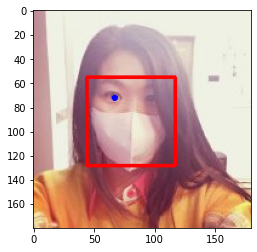

In [61]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/home/data/cleaned_data/train_00025863.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img, (44,55,74,74), (255,0,0), 2)
cv2.circle(img, (67, 72), 1, color=(0,0,255), thickness=2)
plt.imshow(img)
plt.show()

In [12]:
img.shape

(1024, 1024, 3)